**Upload Dataset**


In [ ]:
from google.colab import files 
uploadedFile = files.upload()

Saving PRSA_Data_Aotizhongxin_20130301-20170228.csv to PRSA_Data_Aotizhongxin_20130301-20170228.csv
Saving PRSA_Data_Changping_20130301-20170228.csv to PRSA_Data_Changping_20130301-20170228.csv
Saving PRSA_Data_Dingling_20130301-20170228.csv to PRSA_Data_Dingling_20130301-20170228.csv
Saving PRSA_Data_Dongsi_20130301-20170228.csv to PRSA_Data_Dongsi_20130301-20170228.csv
Saving PRSA_Data_Guanyuan_20130301-20170228.csv to PRSA_Data_Guanyuan_20130301-20170228.csv
Saving PRSA_Data_Gucheng_20130301-20170228.csv to PRSA_Data_Gucheng_20130301-20170228.csv


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import glob

**Concat files**

In [2]:
path = '/content/'

allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)

cols = ['year', 'month', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP',
       'PRES', 'DEWP', 'RAIN', 'WSPM']
frame = frame[cols]
frame = frame.sort_values(['year'])

frame.head(10)

,year,month,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,2013,3,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4
4902,2013,9,21.0,31.0,5.0,55.0,300.0,1.0,17.7,1010.9,16.0,0.0,1.1
4901,2013,9,22.0,50.0,5.0,54.0,300.0,1.0,17.5,1010.6,15.7,0.0,0.4
4900,2013,9,29.0,50.0,8.0,56.0,200.0,1.0,18.5,1010.3,15.4,0.0,0.5
4899,2013,9,50.0,116.0,12.0,72.0,700.0,1.0,19.0,1010.3,15.3,0.0,0.7
4898,2013,9,46.0,108.0,9.0,73.0,700.0,1.0,19.6,1010.0,14.4,0.0,1.5
4897,2013,9,36.0,98.0,6.0,76.0,500.0,1.0,19.6,1009.5,14.8,0.0,0.4
4896,2013,9,47.0,109.0,7.0,79.0,600.0,1.0,19.5,1010.1,14.9,0.0,1.7
4895,2013,9,57.0,155.0,8.0,94.0,1000.0,1.0,19.8,1009.8,15.6,0.0,0.8
4894,2013,9,55.0,147.0,7.0,120.0,1000.0,1.0,20.0,1009.8,15.0,0.0,0.4


**Check if there is any null value in dataset:**

<bound method DataFrame.count of        year  month  PM2.5   PM10   SO2  ...   TEMP    PRES  DEWP  RAIN  WSPM
0      2013      3    4.0    4.0   4.0  ...  -0.70  1023.0 -18.8   0.0   4.4
4902   2013      9   21.0   31.0   5.0  ...  17.70  1010.9  16.0   0.0   1.1
4901   2013      9   22.0   50.0   5.0  ...  17.50  1010.6  15.7   0.0   0.4
4900   2013      9   29.0   50.0   8.0  ...  18.50  1010.3  15.4   0.0   0.5
4899   2013      9   50.0  116.0  12.0  ...  19.00  1010.3  15.3   0.0   0.7
...     ...    ...    ...    ...   ...  ...    ...     ...   ...   ...   ...
34115  2017      1   17.0   26.0   9.0  ...  -4.34  1033.0 -20.9   0.0   0.8
34114  2017      1   16.0   25.0  11.0  ...  -5.70  1033.0 -21.3   0.0   2.0
34113  2017      1   12.0   18.0  13.0  ...  -7.00  1033.0 -21.0   0.0   1.8
34089  2017      1  103.0  107.0  21.0  ...  -2.85  1024.0  -7.9   0.0   3.3
35063  2017      2   19.0   31.0  10.0  ...   8.60  1014.1 -15.9   0.0   1.3

[35064 rows x 13 columns]>

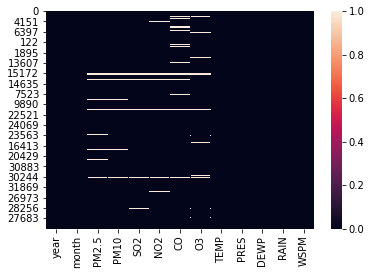

In [3]:
sns.heatmap(frame.isnull())
frame.count

**Removing null values**

<bound method DataFrame.count of        year  month  PM2.5   PM10   SO2  ...   TEMP    PRES  DEWP  RAIN  WSPM
0      2013      3    4.0    4.0   4.0  ...  -0.70  1023.0 -18.8   0.0   4.4
4902   2013      9   21.0   31.0   5.0  ...  17.70  1010.9  16.0   0.0   1.1
4901   2013      9   22.0   50.0   5.0  ...  17.50  1010.6  15.7   0.0   0.4
4900   2013      9   29.0   50.0   8.0  ...  18.50  1010.3  15.4   0.0   0.5
4899   2013      9   50.0  116.0  12.0  ...  19.00  1010.3  15.3   0.0   0.7
...     ...    ...    ...    ...   ...  ...    ...     ...   ...   ...   ...
34115  2017      1   17.0   26.0   9.0  ...  -4.34  1033.0 -20.9   0.0   0.8
34114  2017      1   16.0   25.0  11.0  ...  -5.70  1033.0 -21.3   0.0   2.0
34113  2017      1   12.0   18.0  13.0  ...  -7.00  1033.0 -21.0   0.0   1.8
34089  2017      1  103.0  107.0  21.0  ...  -2.85  1024.0  -7.9   0.0   3.3
35063  2017      2   19.0   31.0  10.0  ...   8.60  1014.1 -15.9   0.0   1.3

[31876 rows x 13 columns]>

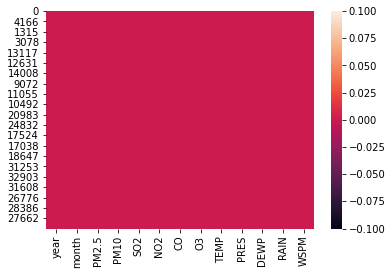

In [4]:
frame = frame.dropna()
sns.heatmap(frame.isnull())
frame.count
#frame.head(10)

**Define Features**

In [5]:
#dependent feature
Y = frame.iloc[:, 13-11]
print(Y)

print()

#independent feature
X = frame.loc[:,['year', 'month', 'PM10', 'SO2',	'NO2', 'CO',	'O3',	'TEMP',	'PRES',	'DEWP',	'RAIN',	'WSPM']]
print(X) 

0          4.0
4902      21.0
4901      22.0
4900      29.0
4899      50.0
         ...  
34115     17.0
34114     16.0
34113     12.0
34089    103.0
35063     19.0
Name: PM2.5, Length: 31876, dtype: float64

       year  month   PM10   SO2   NO2  ...   TEMP    PRES  DEWP  RAIN  WSPM
0      2013      3    4.0   4.0   7.0  ...  -0.70  1023.0 -18.8   0.0   4.4
4902   2013      9   31.0   5.0  55.0  ...  17.70  1010.9  16.0   0.0   1.1
4901   2013      9   50.0   5.0  54.0  ...  17.50  1010.6  15.7   0.0   0.4
4900   2013      9   50.0   8.0  56.0  ...  18.50  1010.3  15.4   0.0   0.5
4899   2013      9  116.0  12.0  72.0  ...  19.00  1010.3  15.3   0.0   0.7
...     ...    ...    ...   ...   ...  ...    ...     ...   ...   ...   ...
34115  2017      1   26.0   9.0  35.0  ...  -4.34  1033.0 -20.9   0.0   0.8
34114  2017      1   25.0  11.0  37.0  ...  -5.70  1033.0 -21.3   0.0   2.0
34113  2017      1   18.0  13.0  31.0  ...  -7.00  1033.0 -21.0   0.0   1.8
34089  2017      1  107.0  21.0

**Pair plotting data frame**

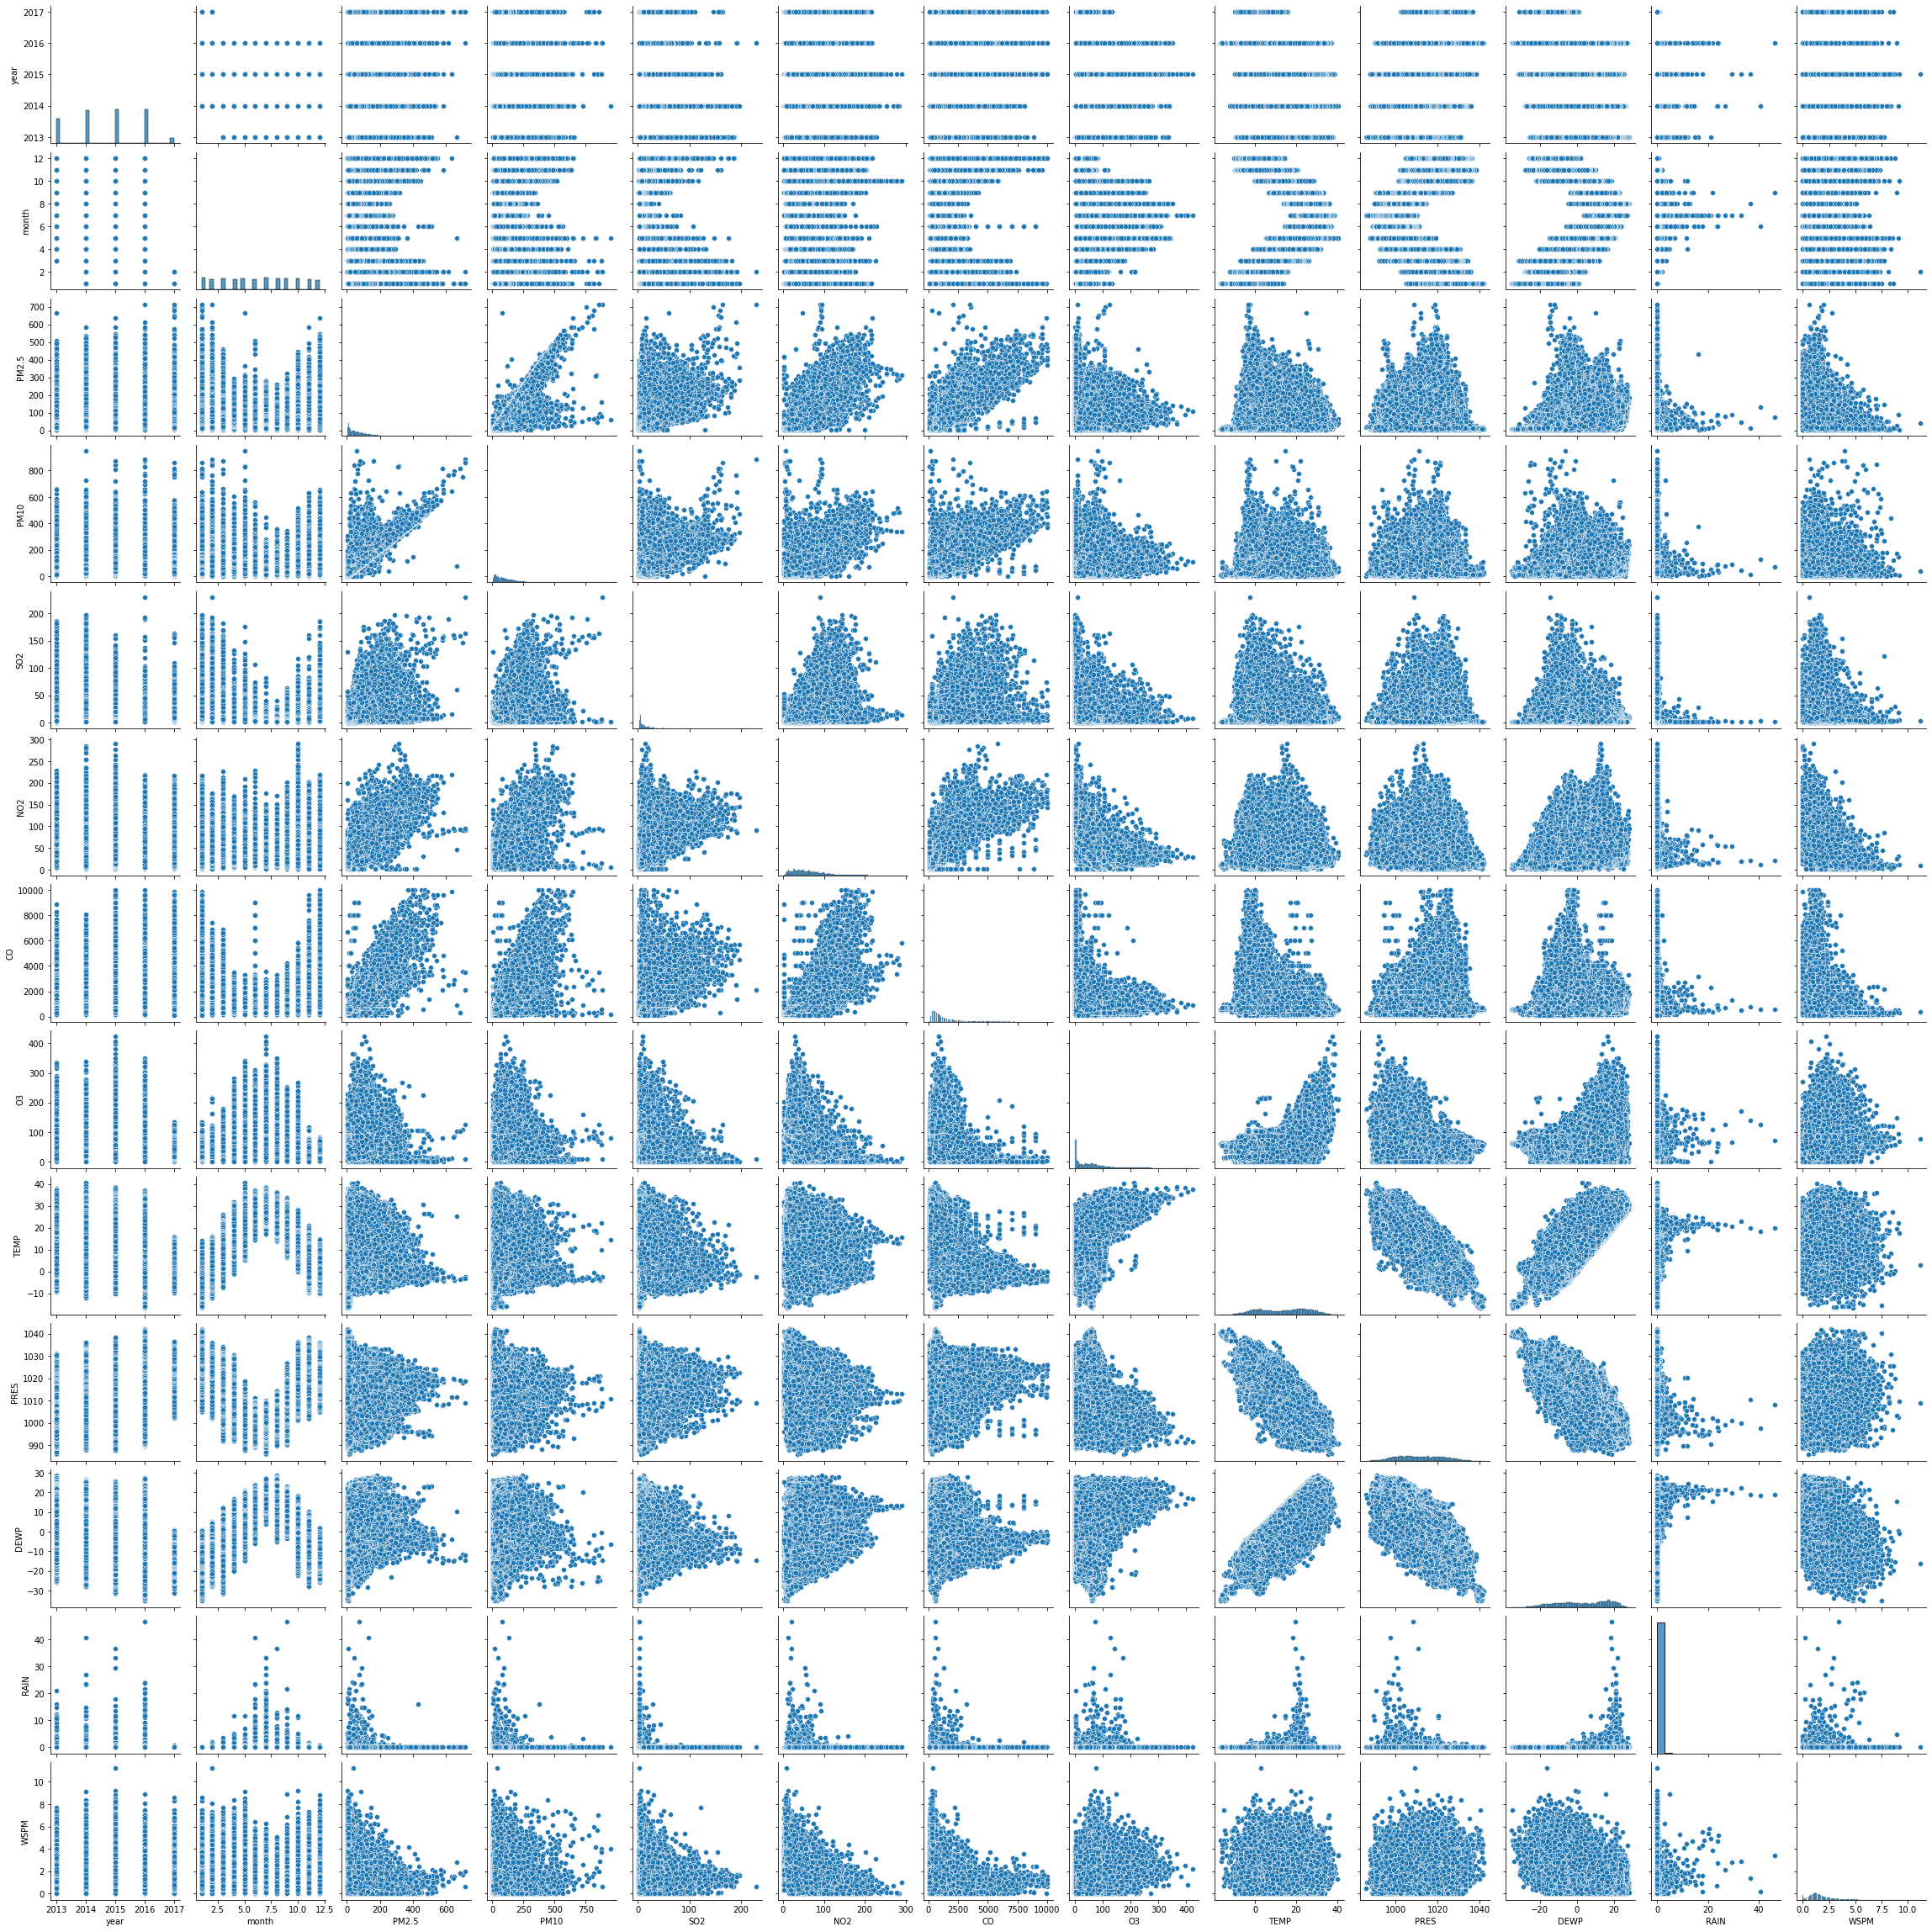

In [6]:
sns.pairplot(frame)

**Correlation Matrix**

In [7]:
corr_mat = frame.corr()
corr_mat

,year,month,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year,1.000000,-0.178911,-0.031467,-0.076109,-0.175075,-0.110232,0.058997,0.084046,-0.160342,0.247249,-0.216465,-0.000507,0.132872
month,-0.178911,1.000000,0.016777,-0.035595,-0.271103,0.109059,0.047462,-0.094068,0.177676,-0.037925,0.319588,0.017608,-0.160105
PM2.5,-0.031467,0.016777,1.000000,0.878856,0.489408,0.686078,0.786293,-0.165974,-0.125734,-0.008630,0.125492,-0.020497,-0.286180
PM10,-0.076109,-0.035595,0.878856,1.000000,0.479783,0.653456,0.682266,-0.146798,-0.110326,-0.034942,0.063967,-0.032762,-0.188718
SO2,-0.175075,-0.271103,0.489408,0.479783,1.000000,0.437167,0.538975,-0.202265,-0.353192,0.204161,-0.282953,-0.044415,-0.112980
NO2,-0.110232,0.109059,0.686078,0.653456,0.437167,1.000000,0.690586,-0.507074,-0.244649,0.085579,0.064183,-0.043230,-0.495205
CO,0.058997,0.047462,0.786293,0.682266,0.538975,0.690586,1.000000,-0.326206,-0.364439,0.214622,-0.096895,-0.018012,-0.284023
O3,0.084046,-0.094068,-0.165974,-0.146798,-0.202265,-0.507074,-0.326206,1.000000,0.588508,-0.423194,0.290961,0.024639,0.345527
TEMP,-0.160342,0.177676,-0.125734,-0.110326,-0.353192,-0.244649,-0.364439,0.588508,1.000000,-0.828275,0.821089,0.037642,0.032265
PRES,0.247249,-0.037925,-0.008630,-0.034942,0.204161,0.085579,0.214622,-0.423194,-0.828275,1.000000,-0.774672,-0.064926,0.075571


Index(['year', 'month', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP',
       'PRES', 'DEWP', 'RAIN', 'WSPM'],
      dtype='object')

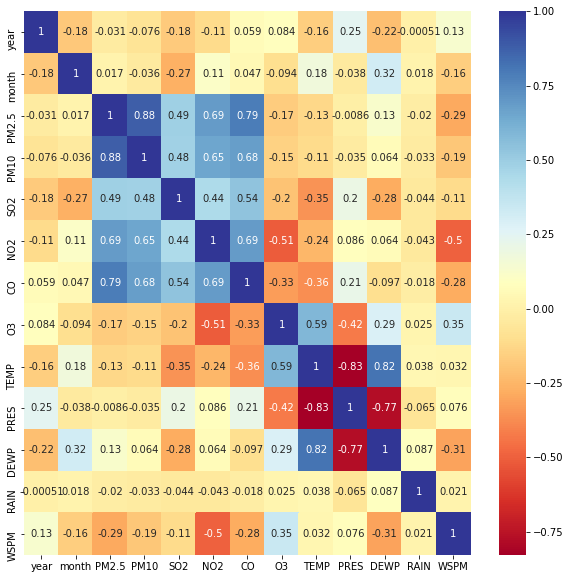

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(frame[corr_mat.index].corr(),annot=True,cmap="RdYlBu")
corr_mat.index

**Improve predictive accuracy and control over-fitting**

In [9]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectKBest,mutual_info_regression
from sklearn.model_selection import cross_val_score

In [24]:
tree_reg = ExtraTreesRegressor()
tree_reg.fit(X,Y)
print(tree_reg.feature_importances_)

[0.01200925 0.01235523 0.49797704 0.02841827 0.10588229 0.27562193
 0.00923422 0.01104294 0.01064239 0.02764126 0.0009851  0.00819009]


In [25]:
X.head(10)

,year,month,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,2013,3,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4
4902,2013,9,31.0,5.0,55.0,300.0,1.0,17.7,1010.9,16.0,0.0,1.1
4901,2013,9,50.0,5.0,54.0,300.0,1.0,17.5,1010.6,15.7,0.0,0.4
4900,2013,9,50.0,8.0,56.0,200.0,1.0,18.5,1010.3,15.4,0.0,0.5
4899,2013,9,116.0,12.0,72.0,700.0,1.0,19.0,1010.3,15.3,0.0,0.7
4898,2013,9,108.0,9.0,73.0,700.0,1.0,19.6,1010.0,14.4,0.0,1.5
4897,2013,9,98.0,6.0,76.0,500.0,1.0,19.6,1009.5,14.8,0.0,0.4
4896,2013,9,109.0,7.0,79.0,600.0,1.0,19.5,1010.1,14.9,0.0,1.7
4895,2013,9,155.0,8.0,94.0,1000.0,1.0,19.8,1009.8,15.6,0.0,0.8
4894,2013,9,147.0,7.0,120.0,1000.0,1.0,20.0,1009.8,15.0,0.0,0.4


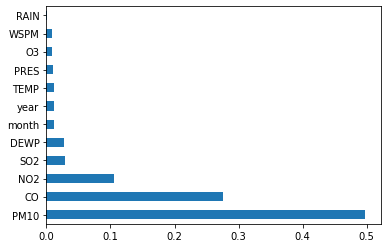

In [26]:
feature_importance = pd.Series(tree_reg.feature_importances_, index=X.columns)
feature_importance.nlargest(14).plot(kind='barh')
plt.show()

**Split Data**

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

**ANN**

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [27]:
nuralNetworkModel = Sequential()

Input Layer

In [29]:
nuralNetworkModel.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

Internal Layers

In [30]:
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))

Output Layer:

In [32]:
nuralNetworkModel.add(Dense(1, kernel_initializer='normal',activation='linear'))

Network Compiler

In [34]:
nuralNetworkModel.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
nuralNetworkModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1664      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 256)              

Fitting ANN

In [35]:
nuralNetworkModel.fit(X_train, Y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
1495/1495 [==============================] - 9s 5ms/step - loss: 30.3386 - mean_absolute_error: 30.3386 - val_loss: 17.6802 - val_mean_absolute_error: 17.6802
Epoch 2/100
1495/1495 [==============================] - 8s 5ms/step - loss: 18.8811 - mean_absolute_error: 18.8811 - val_loss: 19.1087 - val_mean_absolute_error: 19.1087
Epoch 3/100
1495/1495 [==============================] - 8s 5ms/step - loss: 18.2974 - mean_absolute_error: 18.2974 - val_loss: 22.2170 - val_mean_absolute_error: 22.2170
Epoch 4/100
1495/1495 [==============================] - 8s 5ms/step - loss: 18.2293 - mean_absolute_error: 18.2293 - val_loss: 22.4054 - val_mean_absolute_error: 22.4054
Epoch 5/100
1495/1495 [==============================] - 8s 5ms/step - loss: 17.3860 - mean_absolute_error: 17.3860 - val_loss: 15.6962 - val_mean_absolute_error: 15.6962
Epoch 6/100
1495/1495 [==============================] - 8s 5ms/step - loss: 16.5988 - mean_absolute_error: 16.5988 - val_loss: 14.9962 - val_mea

**Prediction**

In [38]:
Y_predict = nuralNetworkModel.predict(X_test)
print(Y_predict) 

[[ 31.578783]
 [105.56047 ]
 [ 10.098501]
 ...
 [ 49.34949 ]
 [ 47.536907]
 [ 69.8054  ]]


Plot:

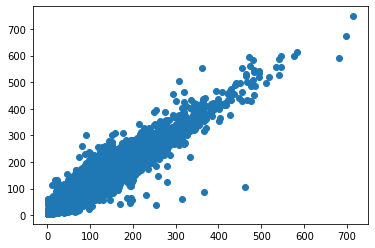

In [39]:
plt.scatter(Y_test,Y_predict)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


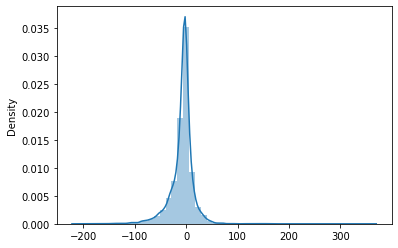

In [40]:
sns.distplot(Y_test.values.reshape(-1,1)-Y_predict)